<a href="https://colab.research.google.com/github/godud2604/AI-bootcamp/blob/main/fashion_mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


### MNIST image array 시각화

Text(0.5, 1.0, '9')

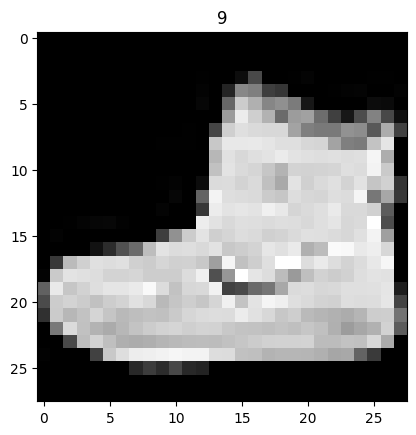

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [ ]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

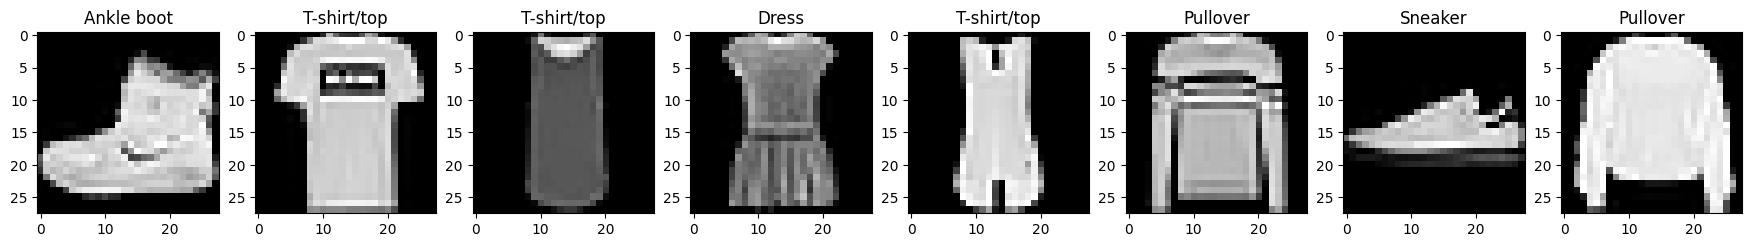

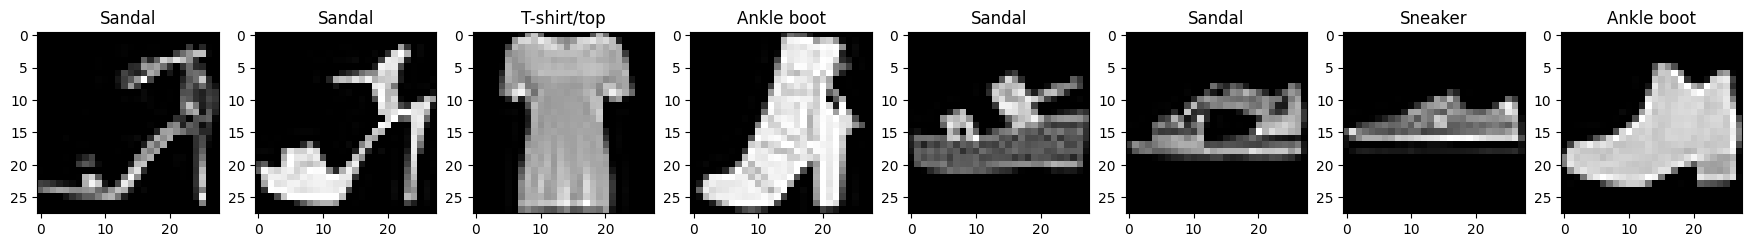

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)

    # 0~7
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8) # [0~7]
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 데이터 전처리 수행.
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환.
  -> 성능이 더 좋아짐
* array type은 float 32

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):

    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
train_labels

array([9., 0., 0., ..., 3., 0., 5.], dtype=float32)

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Dense Layer를 기반으로 모델을 생성

In [ ]:
INPUT_SIZE = 28

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81840 (319.69 KB)
Trainable params: 81840 (319.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델의 Loss와 Optimizer 설정하고 학습 수행
* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical crossentropy를 위해서 Lable을 OHE 로 변경

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical

# 원핫인코딩
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [ ]:
train_oh_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# train_images => 0~1로 정규화 되어있음
# 3차원 => (60000, 28, 28)

# train_oh_labels => categorical crossentropy를 위해서 OHE로 변경
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 11s 3ms/step - loss: 0.5107 - accuracy: 0.8173
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3778 - accuracy: 0.8634
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3402 - accuracy: 0.8751
Epoch 4/20
1803/1875 [===========================>..] - ETA: 0s - loss: 0.3154 - accuracy: 0.8842

KeyboardInterrupt: ignored

In [ ]:
print(history.history['loss'])

# 학습 데이터 기반으로 했으므로, 당연히 오버피팅
print(history.history['accuracy']) # 0.9278


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함.
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [ ]:
test_images.shape

In [ ]:
# 위에서 train 데이터를 이용해서 이미 학습이 되어있는 model 이다.
pred_proba = model.predict(test_images)
print(pred_proba.shape) # softmax

In [ ]:
# 가장 큰 확률의 index가 정답
pred_proba[0]

In [ ]:
test_images[0].shape

In [ ]:
# axis=0 : 제일 앞의 차원 (1, 28, 28)
# axis=1 : (28, 1, 28)
# axis=2 : (28, 28, 1)
# => 제일 마지막 차원 늘릴 때는, axis=-1 을 많이 사용한다.
np.expand_dims(test_images[0], axis=0).shape

In [ ]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)

# 위에서 차원을 늘려줬으니 np.squeeze를 사용해서 다시 차원을 줄여준다.
# => 굳이 해주지 않아도 되지만, 해주는 것이 정석이다.
pred = np.argmax(np.squeeze(pred_proba)) # 제일 큰 확률이 정답
print('predicted class value:', pred)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

### 테스트 데이터 세트로 모델 성능 검증

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

### 검증 데이터 세트를 이용하여 학습 수행.
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움.
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐.
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):

    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


### 검증 데이터 세트를 적용하여 학습 수행.

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels),
                    epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 3s 5ms/step - loss: 0.5920 - accuracy: 0.7973 - val_loss: 0.4588 - val_accuracy: 0.8344
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4132 - accuracy: 0.8557 - val_loss: 0.4321 - val_accuracy: 0.8461
Epoch 3/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3777 - accuracy: 0.8665 - val_loss: 0.3831 - val_accuracy: 0.8610
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3505 - accuracy: 0.8751 - val_loss: 0.3624 - val_accuracy: 0.8673
Epoch 5/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3284 - accuracy: 0.8813 - val_loss: 0.3546 - val_accuracy: 0.8707
Epoch 6/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3192 - accuracy: 0.8832 - val_loss: 0.3531 - val_accuracy: 0.8741
Epoch 7/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3006 - accuracy: 0.8909 - val_loss: 0.3358 - val_accuracy: 0.8790
Epoch 

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.592039167881012, 0.4131626486778259, 0.37773454189300537, 0.350498229265213, 0.3283785283565521, 0.3191973865032196, 0.3006363809108734, 0.2885286509990692, 0.28033122420310974, 0.2700793445110321, 0.26033154129981995, 0.25561752915382385, 0.24781057238578796, 0.2416718751192093, 0.23488110303878784, 0.22933292388916016, 0.22313928604125977, 0.21748565137386322, 0.21480123698711395, 0.21149186789989471]
[0.7973333597183228, 0.8557058572769165, 0.8664705753326416, 0.8751176595687866, 0.8812941312789917, 0.8832352757453918, 0.890862762928009, 0.8947058916091919, 0.8977646827697754, 0.8996862769126892, 0.9038431644439697, 0.9059019684791565, 0.9080196022987366, 0.9104117751121521, 0.9130588173866272, 0.9146274328231812, 0.9169999957084656, 0.9195882081985474, 0.9197254776954651, 0.9212157130241394]
[0.45876193046569824, 0.4320533871650696, 0.3830602169036865, 0.3623601794242859, 0.35462138056755066, 0.35309576988220215, 0.3357681334018707, 0.34780728816986084, 0.34108883142471313, 0.32

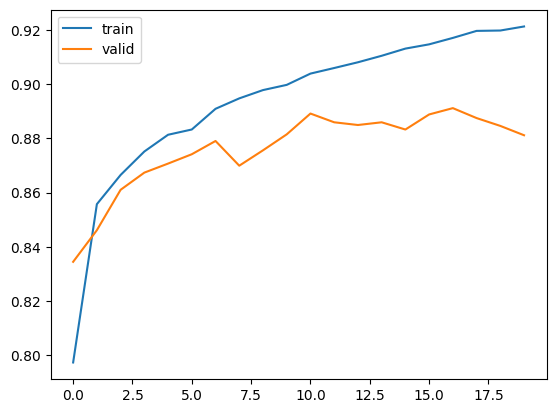

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

In [ ]:
# Sequential Model을 이용하여 Keras 모델 생성
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81840 (319.69 KB)
Trainable params: 81840 (319.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 30)                3030      
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
Total params: 81840 (319.69 KB)
Trainable params: 81840 (319.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Custom한 Dense Layer 생성하기

In [ ]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    # CustomDense 객체에 callable로 입력된 입력 데이터 처리.
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# input 값을 4개의 원소를 가지는 1차원으로 생성.
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력
outputs = CustomDense(10)(inputs)

# inputs와 outputs로 model 생성.
model = Model(inputs, outputs)
model.summary()


### Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방.

In [ ]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성.
model = Model(inputs, outputs)
model.summary()

### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                   CustomDense(10),
                   CustomDense(8),
                   tf.keras.layers.ReLU()])
model.summary()

### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용.
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주.
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.
    else:
        callable_inputs = layer(callable_inputs)

outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


### 앞에서 생성한 로직들을 함수화
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [2]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model


In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):

    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용.
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)

    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels )


In [4]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [5]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81840 (319.69 KB)
Trainable params: 81840 (319.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# 학습 수행.
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))


Epoch 1/20
399/399 [==============================] - 7s 4ms/step - loss: 0.5956 - accuracy: 0.7983 - val_loss: 0.4750 - val_accuracy: 0.8301
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4171 - accuracy: 0.8537 - val_loss: 0.4272 - val_accuracy: 0.8484
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3749 - accuracy: 0.8663 - val_loss: 0.4013 - val_accuracy: 0.8539
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3566 - accuracy: 0.8725 - val_loss: 0.3683 - val_accuracy: 0.8662
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3378 - accuracy: 0.8789 - val_loss: 0.3701 - val_accuracy: 0.8657
Epoch 6/20
399/399 [==============================] - 3s 8ms/step - loss: 0.3247 - accuracy: 0.8826 - val_loss: 0.3545 - val_accuracy: 0.8732
Epoch 7/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3075 - accuracy: 0.8891 - val_loss: 0.3570 - val_accuracy: 0.8718
Epoch 

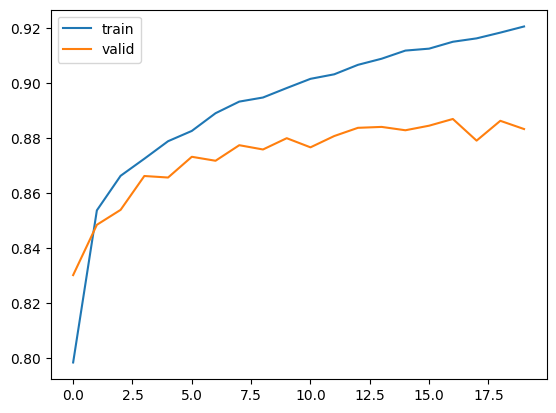

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)

In [8]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)


40/40 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8822


[0.3505743443965912, 0.8822000026702881]

### Callback

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장
* monitor: 모니터할 지표(loss 또는 평가 지표)
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추.

In [9]:
!pwd

/content


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

Epoch 1/10
399/399 [==============================] - 3s 5ms/step - loss: 0.6214 - accuracy: 0.7857 - val_loss: 0.4627 - val_accuracy: 0.8397
Epoch 2/10
399/399 [==============================] - 2s 4ms/step - loss: 0.4161 - accuracy: 0.8559 - val_loss: 0.4278 - val_accuracy: 0.8484
Epoch 3/10
387/399 [============================>.] - ETA: 0s - loss: 0.3774 - accuracy: 0.8647
Epoch 3: val_loss improved from inf to 0.39849, saving model to /kaggle/working/weights.03-0.40.hdf5
399/399 [==============================] - 2s 4ms/step - loss: 0.3777 - accuracy: 0.8646 - val_loss: 0.3985 - val_accuracy: 0.8559
Epoch 4/10
399/399 [==============================] - 2s 4ms/step - loss: 0.3494 - accuracy: 0.8748 - val_loss: 0.3724 - val_accuracy: 0.8617
Epoch 5/10
399/399 [==============================] - 1s 4ms/step - loss: 0.3276 - accuracy: 0.8817 - val_loss: 0.3572 - val_accuracy: 0.8706
Epoch 6/10
389/399 [============================>.] - ETA: 0s - loss: 0.3112 - accuracy: 0.8868
Epoch 6:

In [11]:
!ls -lia
#!rm -rf weight*
#!ls -lia


total 16
3801101 drwxr-xr-x 1 root root 4096 Nov 10 14:22 .
2621466 drwxr-xr-x 1 root root 4096 Nov 14 11:11 ..
2752557 drwxr-xr-x 4 root root 4096 Nov 10 14:21 .config
3801102 drwxr-xr-x 1 root root 4096 Nov 10 14:22 sample_data


#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴
* monitor: 모니터할 지표(loss 또는 평가 지표)
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수.
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추.

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 4s 6ms/step - loss: 0.6040 - accuracy: 0.7893 - val_loss: 0.4838 - val_accuracy: 0.8254 - lr: 0.0010
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.4185 - accuracy: 0.8530 - val_loss: 0.4182 - val_accuracy: 0.8493 - lr: 0.0010
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3784 - accuracy: 0.8665 - val_loss: 0.3695 - val_accuracy: 0.8664 - lr: 0.0010
Epoch 4/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3463 - accuracy: 0.8762 - val_loss: 0.3759 - val_accuracy: 0.8660 - lr: 0.0010
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3282 - accuracy: 0.8810 - val_loss: 0.3491 - val_accuracy: 0.8751 - lr: 0.0010
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3085 - accuracy: 0.8887 - val_loss: 0.3736 - val_accuracy: 0.8656 - lr: 0.0010
Epoch 7/30
399/399 [==============================] - 2s 4ms/step - lo

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표)
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수.
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추.

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

Epoch 1/30
399/399 [==============================] - 3s 4ms/step - loss: 0.5939 - accuracy: 0.8016 - val_loss: 0.4489 - val_accuracy: 0.8402
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.4138 - accuracy: 0.8537 - val_loss: 0.3989 - val_accuracy: 0.8550
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3727 - accuracy: 0.8683 - val_loss: 0.3670 - val_accuracy: 0.8672
Epoch 4/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3456 - accuracy: 0.8742 - val_loss: 0.3518 - val_accuracy: 0.8733
Epoch 5/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3272 - accuracy: 0.8825 - val_loss: 0.3515 - val_accuracy: 0.8760
Epoch 6/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3127 - accuracy: 0.8863 - val_loss: 0.3619 - val_accuracy: 0.8670
Epoch 7/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2978 - accuracy: 0.8917 - val_loss: 0.3289 - val_accuracy: 0.8776
Epoch 

In [ ]:
!rm weigh*

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
399/399 [==============================] - 3s 5ms/step - loss: 0.5937 - accuracy: 0.7960 - val_loss: 0.4616 - val_accuracy: 0.8374 - lr: 0.0010
Epoch 2/40
399/399 [==============================] - 2s 4ms/step - loss: 0.4237 - accuracy: 0.8530 - val_loss: 0.4200 - val_accuracy: 0.8520 - lr: 0.0010
Epoch 3/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3809 - accuracy: 0.8657 - val_loss: 0.3923 - val_accuracy: 0.8606 - lr: 0.0010
Epoch 4/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3542 - accuracy: 0.8753 - val_loss: 0.3761 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 5/40
399/399 [==============================] - 2s 5ms/step - loss: 0.3346 - accuracy: 0.8791 - val_loss: 0.3582 - val_accuracy: 0.8740 - lr: 0.0010
Epoch 6/40
399/399 [==============================] - 3s 7ms/step - loss: 0.3180 - accuracy: 0.8855 - val_loss: 0.3618 - val_accuracy: 0.8712 - lr: 0.0010
Epoch 7/40
399/399 [==============================] - 2s 4ms/step - lo

In [ ]:
!ls -lia